In [26]:
%load_ext autoreload
%autoreload 2
import glob, sys
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.interpolate import interp1d
from scipy.integrate import simps
import pyccl as ccl
import clmm
from clmm import Cosmology
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('./')
import _load_data
sys.path.append('../../')
import _redshift_richness_bins as analysis_

import pickle
def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
analysis = {}
path_to_data = '../../../CLCosmo_Sim_database/data/'
lensing_data_truez = path_to_data + 'stacked_esd_profiles_redmapper_true_full_coverage.pkl'
#baseline
edges = clmm.dataops.make_bins(0.5, 10, 15, method='evenlog10width')
analysis_Duffy08_baseline = {'type': 'WLxN',
                            'fit_cosmo':'True',
                            'cosmo_params': 'Om_s8',
                            'density_profile':'nfw',
                            'cM_relation':'Duffy08',
                            'two_halo':'False',
                            'hmf':'Despali16',
                            'radius_max':3.5,
                            'radius_min':1.,
                             'radius_edges':edges,
                             'radius_centers':np.array([(edges[i+1] + edges[i])/2 for i in range(len(edges)-1)]),
                            'photoz':'Truez',
                            'shear_richness_cov':'False',
                            'redshift_range':'Full',
                            'richness_range':'Full',
                            'redshift_bins': analysis_.Z_bin,
                            'richness_bins': analysis_.Obs_bin,
                             'redshift_corner': analysis_.z_corner,
                            'richness_corner': analysis_.rich_corner,
                            'redshift_bin_index': np.arange(len(analysis_.Z_bin)),
                            'richness_bin_index': np.arange(len(analysis_.Obs_bin)),
                            'redshift_corner_index': np.arange(len(analysis_.z_corner)),
                            'richness_corner_index': np.arange(len(analysis_.rich_corner)),
                            'lensing_data':lensing_data_truez,
                            'add_bias_lensing':'False',
                            'Gauss+SSC-CC_likelihood':'False',
                            'name_plot':'baseline'}

In [28]:

r, N_obs, DS_obs_fct, Err_obs_fct, mask_is_in_fit_range = _load_data.load_data_vary_cosmology(analysis_Duffy08_baseline)


[load data]: counts
[load data]: stacked lensing profiles and errors


In [29]:
r_mask = r[mask_is_in_fit_range[:,0,0]]

In [30]:
N_obs, DS_obs, Err_obs, mask_is_in_fit_range = _load_data.load_data(analysis_Duffy08_baseline)

[load data]: counts
[load data]: stacked lensing profiles and errors


Text(0, 0.5, '$[M_{\\odot}/Mpc^2]$')

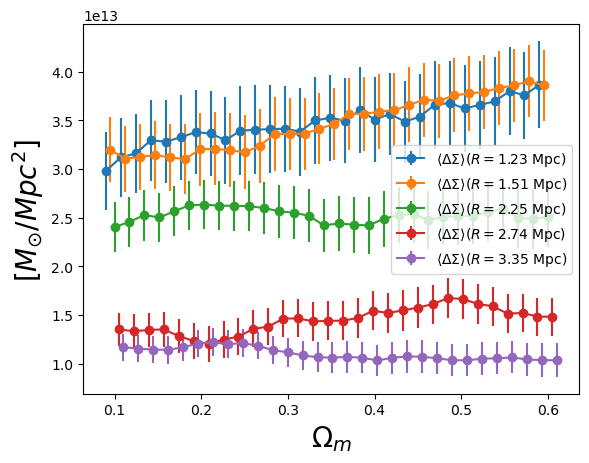

In [31]:
Om_list = np.linspace(0.1, 0.6, 30)


for i, z_bin in enumerate(analysis_.Z_bin):
    if i != 1: continue
    for j, richness_bin in enumerate(analysis_.Obs_bin):
        if j != 1: continue
        ds = []
        ds_err = []
        for Om_k in Om_list:
            DS_obs_, Err_obs_ = DS_obs_fct(Om_k), Err_obs_fct(Om_k)
            ds.append(DS_obs_[:,j,i])
            ds_err.append(Err_obs_[:,j,i])

        plt.errorbar(Om_list-2*0.005, np.array(ds)[:,1], np.array(ds_err)[:,1], marker='o', label = r'$\langle \Delta\Sigma \rangle (R = $'+f'{r_mask[1]:.2f} Mpc)')
        plt.errorbar(Om_list-1*0.005, np.array(ds)[:,2], np.array(ds_err)[:,2], marker='o', label = r'$\langle \Delta\Sigma \rangle (R = $'+f'{r_mask[2]:.2f} Mpc)')
        plt.errorbar(Om_list-0*0.005, np.array(ds)[:,3], np.array(ds_err)[:,3], marker='o', label = r'$\langle \Delta\Sigma \rangle (R = $'+f'{r_mask[4]:.2f} Mpc)')
        plt.errorbar(Om_list+1*0.005, np.array(ds)[:,5], np.array(ds_err)[:,5], marker='o', label = r'$\langle \Delta\Sigma \rangle (R = $'+f'{r_mask[5]:.2f} Mpc)')
        plt.errorbar(Om_list+2*0.005, np.array(ds)[:,6], np.array(ds_err)[:,6], marker='o', label = r'$\langle \Delta\Sigma \rangle (R = $'+f'{r_mask[6]:.2f} Mpc)')
        plt.xlabel(r'$\Omega_m$', fontsize=20)
        plt.legend()
        break
    break
plt.ylabel(r'$[M_{\odot}/Mpc^2]$', fontsize=20)


In [33]:
path = '../../../CLCosmo_Sim_database/data_vary_fuducial_cosmology/'
data = np.load(path+'stacked_esd_profiles_redmapper_vary_Omega_m.pkl', allow_pickle=True)

In [42]:
data['Om0_stacked_profile']



z_mean,obs_mean,obs_rms,radius,DSt,DSx,gt_individual,radius_individual,n_stack,cluster_id,z_individual,obs_individual,z_bin,obs_bin,Om0_W_l,richness,z
float32,float32,float64,float64[15],float64[15],float64[15],object,object,int64,object,object,object,float64[2],int64[2],object,object,object
0.25703847,26.144043,0.3776372133734676,0.5570192640569464 .. 9.124488881741197,55151631971686.81 .. 1384214888318.5215,-8916527504799.469 .. -300523944622.9429,Om0_DSt \n-----------------------------------------\n 6031164328359.764 .. 11184592670164.064\n 76907526454953.62 .. 8473873717753.124\n 81076665507300.94 .. -2025292939160.2712\n-20330722845032.62 .. -10813137983232.102\n 85998455597987.81 .. -1760079562786.639\n 126686932023202.86 .. 8484729562052.015\n 87904573378358.05 .. -1251330055647.445\n 15171742053065.92 .. 16724299476311.715\n 66752603710145.01 .. -2173356479341.94\n 68115106244296.04 .. 6904757061629.661\n ...\n -63077807576774.77 .. -7342150421938.656\n 36762081019262.88 .. 6999912805713.868\n25319629907992.543 .. -3562657405312.8936\n 93565822958587.27 .. -1606370861192.733\n 103547409180722.45 .. 7694459967625.403\n 105192102514283.1 .. 8555529579946.786\n 130278066790381.23 .. 12490632623459.45\n 107812749137128.16 .. -360417220652.1364\n 24796292522183.08 .. 7569498296732.709\n 96406060240154.19 .. 8350672397025.098\n 134648804422756.84 .. -4807573743039.545\nLength = 142 rows,Om0_radius \n---------------------------------------\n0.5619049226723243 .. 9.126399856910398\n0.5564628333202976 .. 9.131166700259982\n 0.5585979695237528 .. 9.12779077821812\n0.5531400079708233 .. 9.127072643271122\n0.5539707230836174 .. 9.122108010890999\n 0.557912715346277 .. 9.122402088896036\n0.5572831737372256 .. 9.130480803651249\n0.5591334310776441 .. 9.122289171012405\n0.5555144078214751 .. 9.137472419396708\n0.5548274875203498 .. 9.109374666431595\n ...\n0.5554382141200327 .. 9.120932466475438\n0.5554372963168682 .. 9.132258077342486\n0.5606317838353856 .. 9.140338252414015\n0.5576733784435189 .. 9.129225376721532\n 0.5573709180238651 .. 9.12805245665595\n0.5613724271435792 .. 9.126891330717985\n0.5548458406800917 .. 9.118528850768035\n 0.5576043541875287 .. 9.12487350563696\n0.5574143809610712 .. 9.139228915335673\n0.5509626015489162 .. 9.111235273470339\n0.5577132193755757 .. 9.134175739254921\nLength = 142 rows,142,cluster_id\n----------\n 1694\n 3058\n 3245\n 3616\n 1509\n 3400\n 3556\n 1630\n 6456\n 1834\n ...\n 3468\n 3932\n 1584\n 1851\n 2124\n 2398\n 2655\n 2594\n 2896\n 3053\n 2836\nLength = 142 rows,z \n----------\n0.24816975\n0.26828986\n0.25567377\n0.24887659\n0.21490279\n 0.2749144\n0.28667873\n0.20163186\n 0.2637991\n0.28944972\n ...\n0.22966085\n0.28476527\n0.20339419\n0.20889707\n0.23428226\n 0.2949085\n0.21902871\n 0.2733281\n0.23162916\n0.28033063\n0.25193316\nLength = 142 rows,richness\n---------\n34.297394\n25.037626\n 28.36321\n21.605257\n 31.76507\n24.793547\n21.132353\n33.092255\n20.461134\n32.039658\n ...\n22.459536\n 22.87142\n30.651457\n34.129593\n33.443115\n32.482056\n30.148043\n27.875051\n23.985033\n33.351585\n26.990263\nLength = 142 rows,0.2 .. 0.3,20 .. 35,Om0_W_l \n------------------------------------------------\n1.6297056212939496e-29 .. 3.8452596805323686e-27\n1.4610623753691904e-29 .. 3.7082235848408026e-27\n 1.2147624783920514e-29 .. 3.583708161934505e-27\n1.2057951790775206e-29 .. 3.7249314585117186e-27\n 1.5429990347052062e-29 .. 4.070150975443385e-27\n 1.256225062050685e-29 .. 3.0955966877490787e-27\n 1.643585596886029e-29 .. 3.1829710836295853e-27\n 2.1602896830190947e-29 .. 4.162912467700364e-27\n 1.4155094937540668e-29 .. 3.452529555636279e-27\n 1.4012321949713454e-29 .. 3.159342077337373e-27\n ...\n1.2944443755170674e-29 .. 2.8868703691800045e-27\n1.2521923452826437e-29 .. 1.9566570630357602e-27\n 1.8260647318999516e-29 .. 3.247577328521871e-27\n1.4091291774973434e-29 .. 4.6941587899174756e-27\n 2.0533066374820882e-29 .. 3.884230601304554e-27\n1.4447889839763937e-29 .. 2.9445446600759744e-